Step 1. Mount Google Drive untuk mengakses file dataset.

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 2. Mengimpor library untuk manipulasi data, visualisasi, dan forecasting.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

Step 3. Load dataset CSV, lalu parsing kolom Date dan Orders.

In [22]:
file_path = '/content/drive/MyDrive/online_store_orders.csv'

df = pd.read_csv(file_path, header=None, skiprows=1)

df = df[0].str.split(expand=True)

df.columns = ["Date", "Orders"]

df["Orders"] = pd.to_numeric(df["Orders"], errors="coerce")
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

Step 4. Membuat grafik tren harian jumlah order.

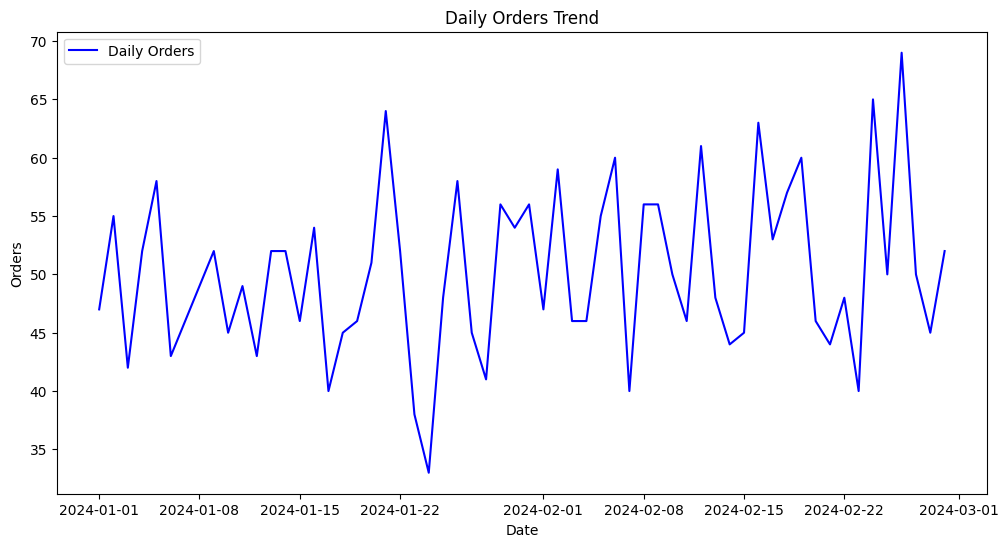

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Orders'], label='Daily Orders', color='blue')
plt.title('Daily Orders Trend')
plt.xlabel('Date')
plt.ylabel('Orders')
plt.legend()
plt.show()

Step 5. Menghitung dan mem-plot SMA & EMA 14 hari.

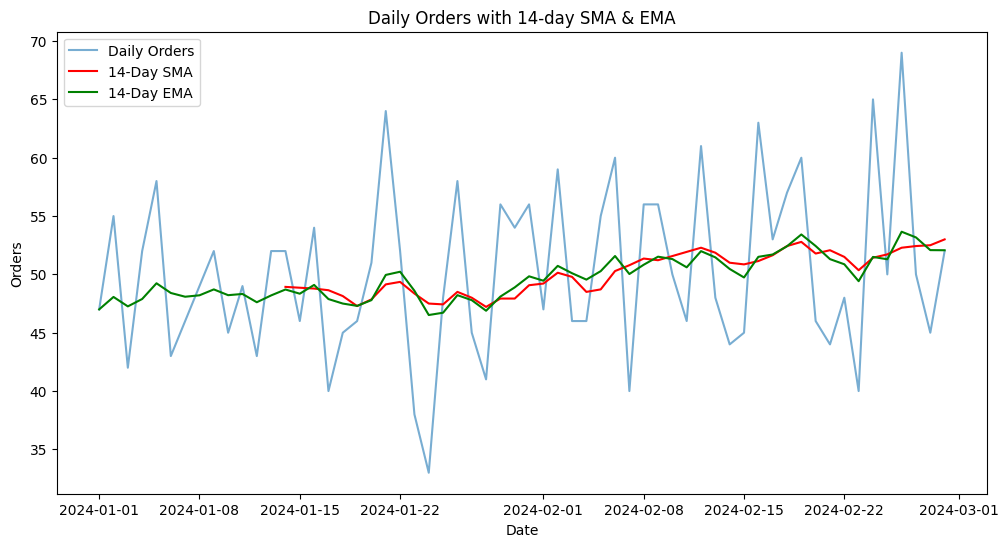

In [17]:
df['SMA_14'] = df['Orders'].rolling(window=14).mean()
df['EMA_14'] = df['Orders'].ewm(span=14, adjust=False).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Orders'], label='Daily Orders', alpha=0.6)
plt.plot(df['Date'], df['SMA_14'], label='14-Day SMA', color='red')
plt.plot(df['Date'], df['EMA_14'], label='14-Day EMA', color='green')
plt.title('Daily Orders with 14-day SMA & EMA')
plt.xlabel('Date')
plt.ylabel('Orders')
plt.legend()
plt.show()

Step 6. Membangun model Simple Exponential Smoothing untuk forecasting.

In [21]:
forecast_value = df['EMA_14'].iloc[-1]

print("Forecast order untuk hari berikutnya (berdasarkan EMA 14):", round(forecast_value))

Forecast order untuk hari berikutnya (berdasarkan EMA 14): 52


Step 7. Menampilkan hasil forecast dan mem-plot titik prediksi untuk hari berikutnya.

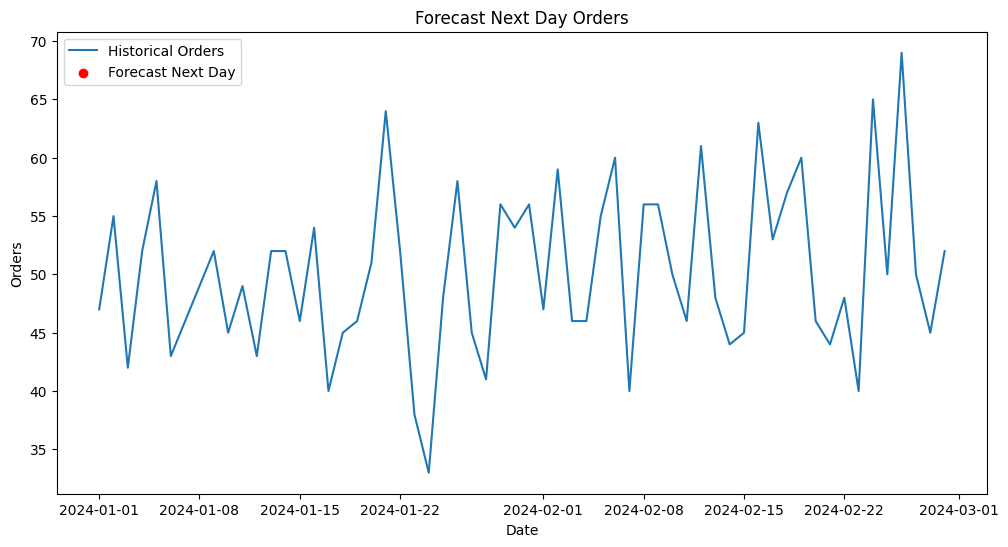

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Orders'], label='Historical Orders')
plt.scatter(df['Date'].iloc[-1] + pd.Timedelta(days=1),
            forecast.iloc[0],
            color='red', label='Forecast Next Day', zorder=5)
plt.title('Forecast Next Day Orders')
plt.xlabel('Date')
plt.ylabel('Orders')
plt.legend()
plt.show()